<h1 style="color: blue; text-align: center; font-size: 25px;"><b>PhiUSIIL: A Machine Learning-Based Phishing URL Classifier</b></h1>
<h1 style="color: blue; text-align: center; font-size: 20px;"><b>DSML Capstone Project</b></h1>

### Problem Description :
With the increasing reliance on the internet for financial transactions, personal communications, and business operations, phishing attacks have emerged as a significant cybersecurity threat. Phishing websites impersonate legitimate entities to deceive users into revealing sensitive information, such as passwords, credit card details, and personal data.

Detecting phishing websites accurately and efficiently is a crucial challenge in cybersecurity. Traditional methods, such as blacklists, fail to detect new phishing sites in real time. Therefore, machine learning-based approaches using URL and webpage source code features have gained prominence in identifying phishing threats proactively.

In this project, we utilize the PhiUSIIL Phishing URL Dataset, which contains 134,850 legitimate URLs and 100,945 phishing URLs, to develop a robust phishing detection model. The dataset includes features extracted from the webpage source code and URL structure, such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb, which are derived from existing URL-based attributes.

### Objective :
To analyze these features and implement machine learning techniques to classify URLs as legitimate or phishing, improving the accuracy and efficiency of phishing detection systems. Through this project, we aim to contribute to the development of automated security solutions that help protect users from online fraud and cyber threats.

### DataSet :
(https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)

### Understand the Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### Loading

In [6]:
data=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [7]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [8]:
data.shape

(235795, 56)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [10]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [11]:
data.groupby("label").describe()

URLLength                                                        \
          count       mean        std   min   25%   50%   75%     max   
label                                                                   
0      100945.0  45.720293  61.145523  13.0  26.0  34.0  48.0  6097.0   
1      134850.0  26.228610   4.815612  15.0  23.0  26.0  29.0    57.0   

      DomainLength             ... NoOfEmptyRef         NoOfExternalRef  \
             count       mean  ...          75%     max           count   
label                          ...                                        
0         100945.0  24.465144  ...          0.0    91.0        100945.0   
1         134850.0  19.228610  ...          3.0  4887.0        134850.0   

                                                               
            mean         std  min   25%   50%    75%      max  
label                                                          
0       1.128119    3.204587  0.0   0.0   0.0    1.0    368.0  
1      85.294601  205.669475  0.0  17.0  46.0  106.0  27516.0  

[2 rows x 400 columns]

## Preprocessing and EDA

**checking for null values**

In [14]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

**Checking for duplicates**

In [16]:
data.duplicated().sum()

0

<font color=green size=3 >No null values or duplicates founded!

**Check class distribution for finding imbalance**

In [19]:
print(data['label'].value_counts())

label
1    134850
0    100945
Name: count, dtype: int64


In [20]:
#Calculate Class Imbalance Ratio
maj_cls=data['label'].value_counts().max()
min_cls=data['label'].value_counts().min()
ratio=maj_cls/min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.34


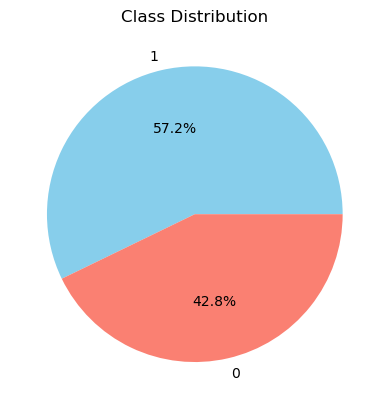

In [21]:
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

Having a mild imbalance (ratio : 1.34), which does not affect the model accuracy.

### Univariate Analysis

**Finding Categorical features for EDA.**

In [25]:
categorical=data.select_dtypes(include='object').columns
categorical

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')

Column 'FILENAME' can be ignored.

In [27]:
#making a copy
df=data.copy()

In [28]:
df.drop(columns='FILENAME', inplace=True)

In [29]:
updated_categorical=df.select_dtypes(include='object').columns
updated_categorical

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')

**Finding numerical featues**

In [31]:
numerical=df.select_dtypes(include='number').columns

**Exclude Binary (0/1) Columns**

In [33]:
# Identify binary columns (only contain 0 and 1)
binary_cols=[col for col in numerical if df[col].nunique()==2]

## Exclude binary columns from numerical analysis
univariate_cols= [col for col in numerical if df[col].nunique()!=2]

print("Numerical columns for univariate analysis:", univariate_cols)
print (f"There are {len(univariate_cols)} numerical features for univariate analysis.")

Numerical columns for univariate analysis: ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
There are 31 numerical features for univariate analysis.


### Lets do some Analysis (Dataset before removing skewness)

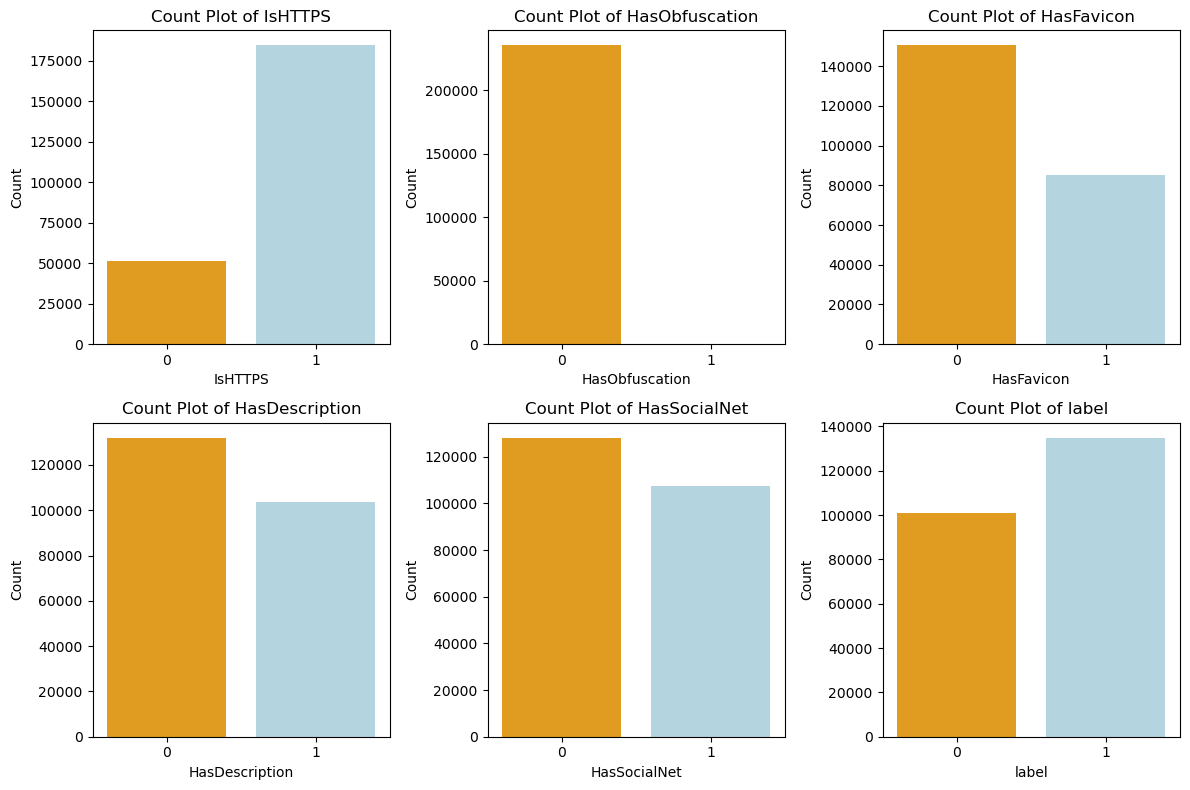

In [35]:

# List of relevant binary features
binary_features = ['IsHTTPS', 'HasObfuscation', 'HasFavicon', 'HasDescription', 'HasSocialNet', 'label']

plt.figure(figsize=(12, 8))
for i, col in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(x=df[col], palette=['orange', 'lightblue'])
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Insights
* IsHTTPS: Most URLs use HTTPS, indicating that HTTPS alone is not a strong indicator of legitimacy.
* HasObfuscation: Very few URLs use obfuscation, suggesting it is not a common technique for phishing.
* HasFavicon: Many phishing URLs lack favicons, making it a potential indicator for phishing detection.
* HasDescription: Many URLs lack a meta description, which could be a potential phishing indicator.
* HasSocialNet: A significant number of URLs do not contain social network links, suggesting that legitimate sites may include them more often.
* Label: The dataset contains more phishing URLs than legitimate ones, indicating an imbalance that may affect model performance.                                                                           

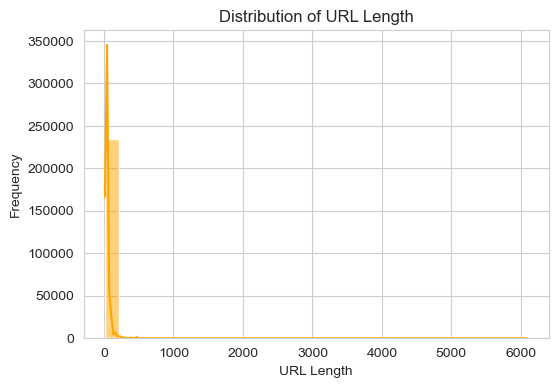

In [37]:
# Set plot style
sns.set_style("whitegrid")

# Histogram: URL Length Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['URLLength'], bins=30, kde=True, color='orange')
plt.title("Distribution of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

#### Insights :
The histogram reveals a right-skewed distribution of URL lengths, with most URLs being relatively short, typically under 500 characters. However, the presence of a few extremely long URLs, potentially over 6000 characters, could indicate obfuscation or suspicious activity, often seen in phishing or malicious websites.

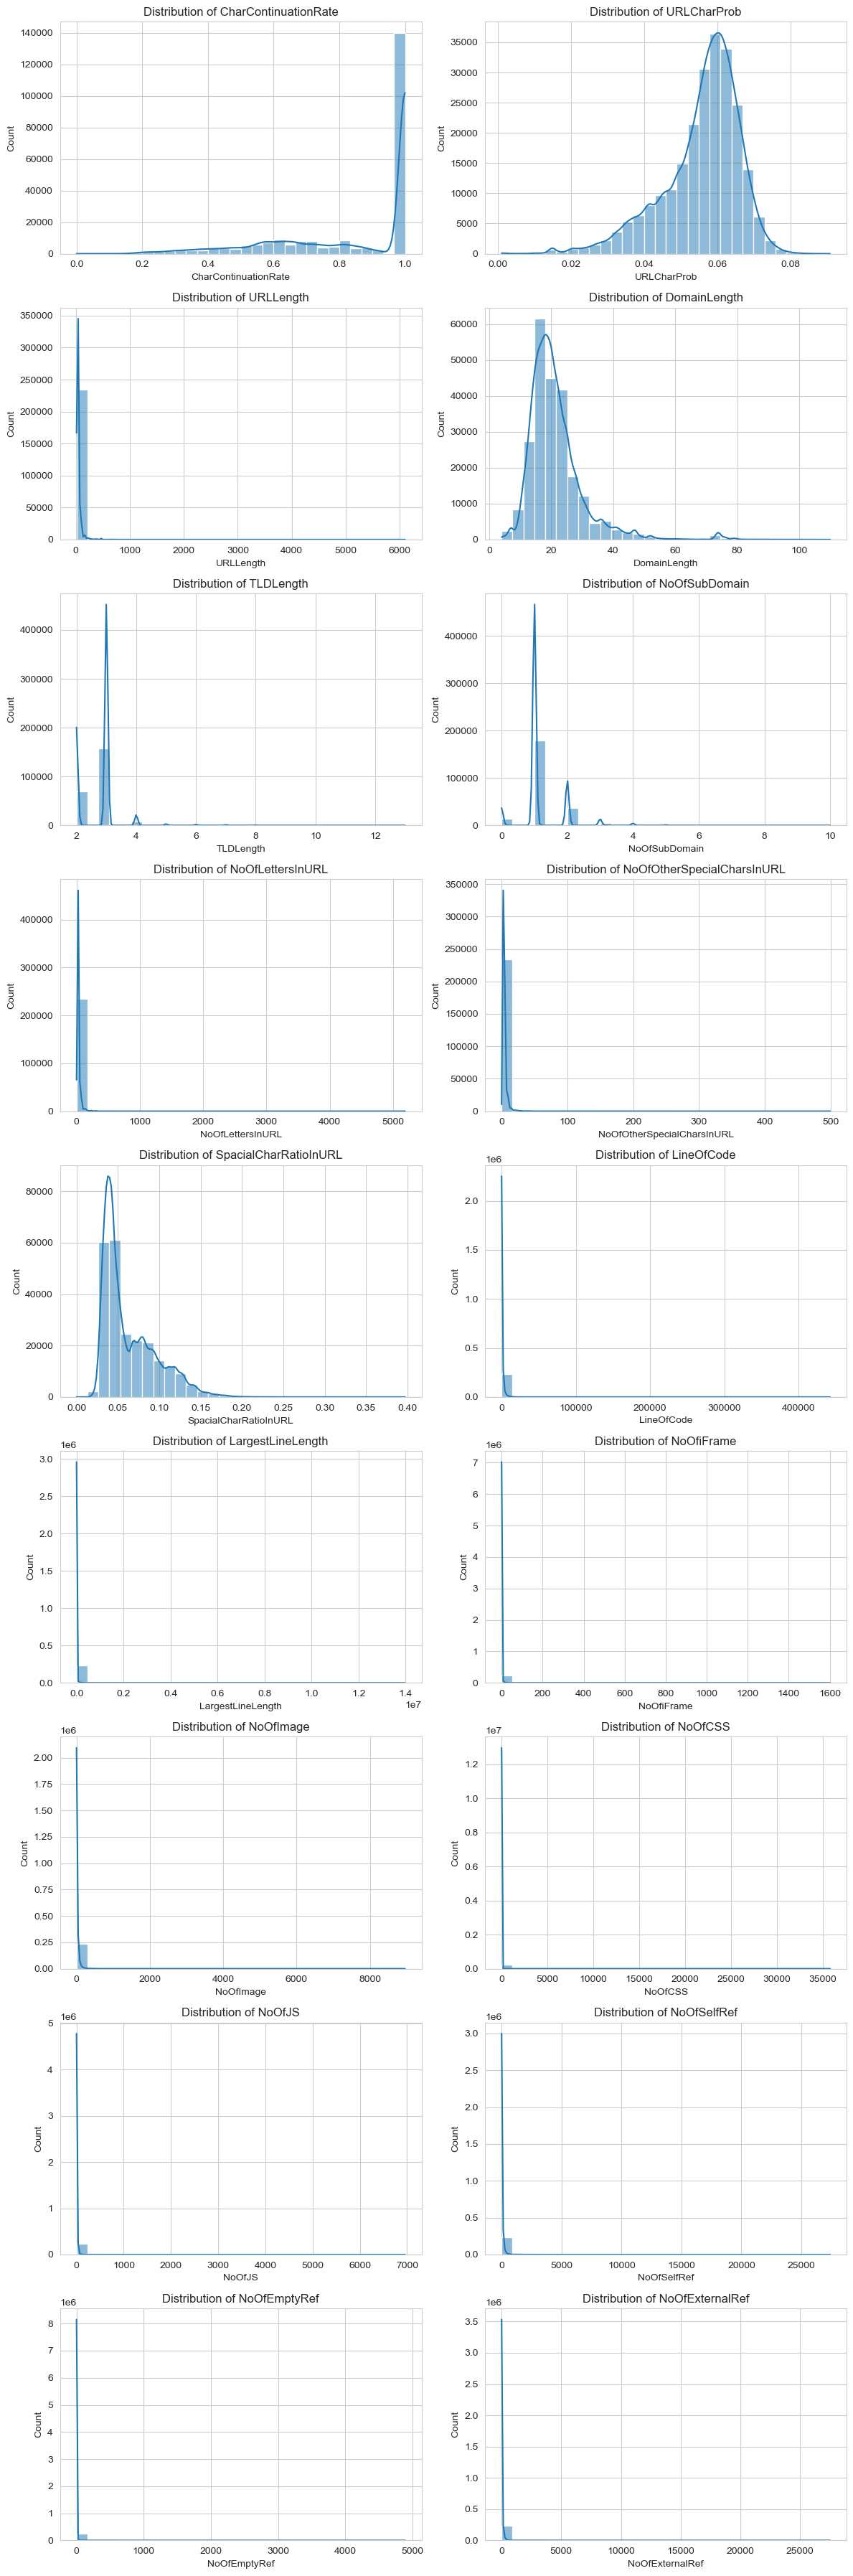

In [124]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.histplot(df[col], kde=True, bins=30,ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


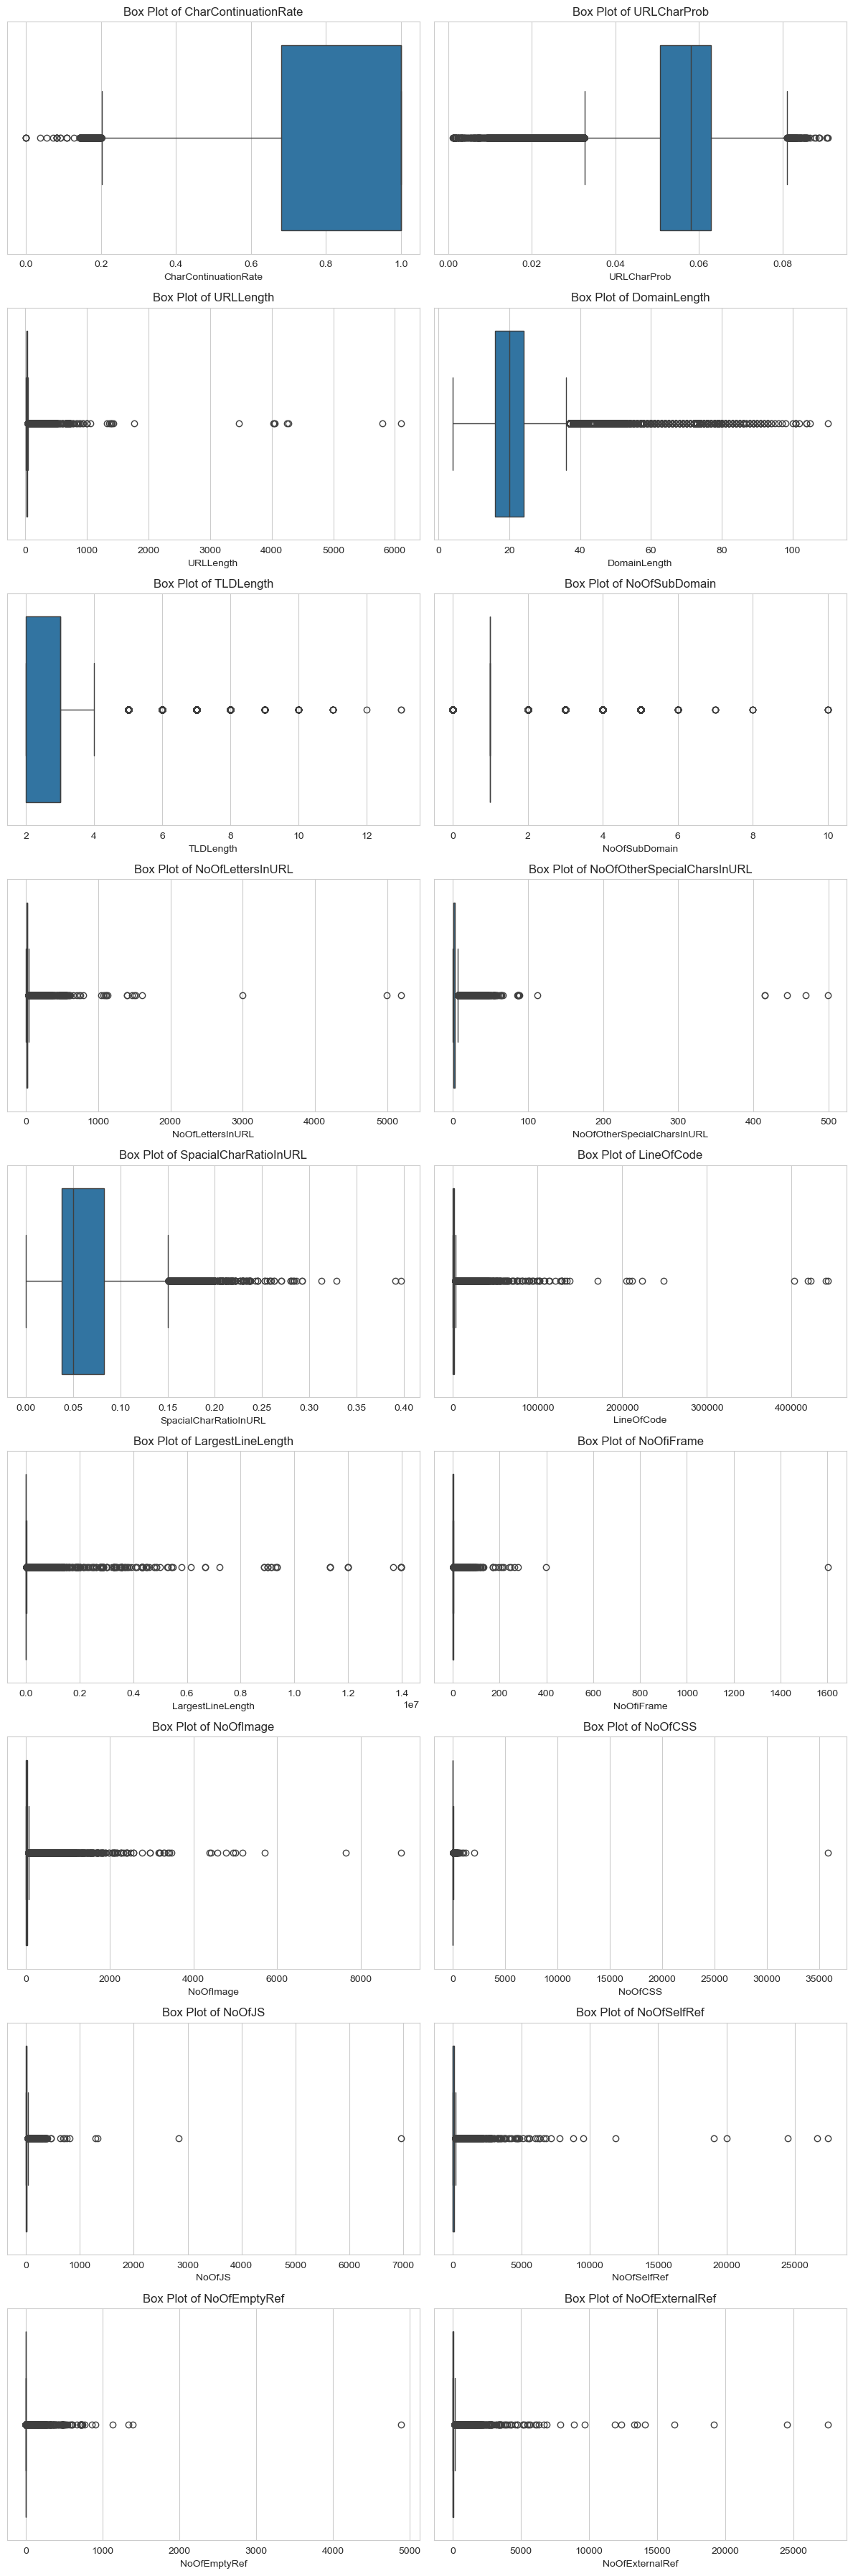

In [126]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Checking Skewness and Kurtosis
**Skewness**

In [42]:
df[univariate_cols].skew()

URLLength                      53.321737
DomainLength                    2.513397
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
DomainTitleMatchScore          -0.008735
URLTitleMatchScore             -0.089085
NoOfPopup                      84.952694
NoOfiFrame      

**Kurtosis**

In [44]:
df[univariate_cols].kurtosis()

URLLength                       5914.008979
DomainLength                      10.660247
URLSimilarityIndex                -0.408037
CharContinuationRate               0.056455
TLDLegitimateProb                 -1.973777
URLCharProb                        1.461184
TLDLength                         13.738667
NoOfSubDomain                      7.788128
NoOfObfuscatedChar             45903.366997
ObfuscationRatio                2125.333536
NoOfLettersInURL                8587.893558
LetterRatioInURL                   0.015907
NoOfDegitsInURL                14318.789145
DegitRatioInURL                   12.236281
NoOfEqualsInURL                19379.093750
NoOfQMarkInURL                    84.597833
NoOfAmpersandInURL             16435.636935
NoOfOtherSpecialCharsInURL      5657.868346
SpacialCharRatioInURL              0.976044
LineOfCode                      5597.197274
LargestLineLength               3212.606584
DomainTitleMatchScore             -1.992655
URLTitleMatchScore              

<font color=red size=3> High Skewness and Kurtosis founded!!

### Outlier Removal

#### IQR Method (threshold =1.5)

In [48]:
# #function for iqr with threshold =1.5
# def iqr_1(df1):
#     for col in univariate_cols:
#         q1=df1[col].quantile(0.25)
#         q3=df1[col].quantile(0.75)
#         iqr=q3-q1
#         l_w=q1-iqr*1.5
#         u_w=q3+iqr*1.5

#          # Remove extreme outliers
#         df1 = df1[(df1[col] >= l_w) & (df1[col] <= u_w)] 
#         return df1

#### IQR Method (threshold =3)

In [50]:
# #function for iqr with threshold = 3
# def iqr_3(df1):
#     for col in univariate_cols:
#         q1=df1[col].quantile(0.25)
#         q3=df1[col].quantile(0.75)
#         iqr=q3-q1
#         l_w=q1-iqr*3
#         u_w=q3+iqr*3

#          # Remove extreme outliers
#         df1 = df1[(df1[col] >= l_w) & (df1[col] <= u_w)] 
#         return df1

#### Z score method

In [52]:
# #function for iqr
# def zscore(df2):
#     from scipy.stats import zscore

#     # Select only numeric columns
#     numeric_cols = df2.select_dtypes(include=['number']).columns

#     # Compute Z-scores only for numeric columns
#     z_scores = df2[numeric_cols].apply(zscore)

#     # Define threshold (usually 3, but you can adjust)
#     threshold = 3

#     # Filter out rows where any column's Z-score exceeds the threshold
#     df_z_removed = df2[(z_scores < threshold).all(axis=1)].copy()

#     return df_z_removed

In [53]:
#Lets choose zscore method
# df =  zscore(data)

In [54]:
df.shape

(235795, 55)

#### For Right-Skewed Data (Positive Skewness):
Use log, square root, or box-cox transformation.

In [56]:
#To find right skewed columns
right_skewed_cols = df[univariate_cols].skew()[df[univariate_cols].skew() > 1].index.tolist()
df[right_skewed_cols].skew()

URLLength                      53.321737
DomainLength                    2.513397
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
NoOfPopup                      84.952694
NoOfiFrame                     97.677347
NoOfImage                      28.230253
NoOfCSS                       464.404031
NoOfJS                        140.435761
NoOfSelfRef                    60.381378
NoOfEmptyRef                  106.826225
NoOfExternalRef                65.900247
dtype: float64

In [57]:
df1=df.copy()
from scipy.stats import boxcox
for col in right_skewed_cols:
    skewness = df1[col].skew()
    if skewness > 1:  # Highly skewed
        df1[col], _ = boxcox(df1[col] + 1) #using boxcox method for removing right skewness
df1[right_skewed_cols].skew()    

URLLength                      0.095034
DomainLength                  -0.046918
TLDLength                     -0.014492
NoOfSubDomain                  0.035998
NoOfObfuscatedChar            21.981435
ObfuscationRatio              21.981435
NoOfLettersInURL              -0.108138
NoOfDegitsInURL                1.390798
DegitRatioInURL                1.457255
NoOfEqualsInURL                6.378214
NoOfQMarkInURL                 5.957591
NoOfAmpersandInURL            16.212384
NoOfOtherSpecialCharsInURL     0.497004
SpacialCharRatioInURL          0.279246
LineOfCode                    -0.103982
LargestLineLength              0.013555
NoOfPopup                      3.826578
NoOfiFrame                     0.802904
NoOfImage                      0.057420
NoOfCSS                        0.140952
NoOfJS                         0.017867
NoOfSelfRef                    0.066672
NoOfEmptyRef                   0.929639
NoOfExternalRef                0.061736
dtype: float64

#### For Left-Skewed Data (Negative Skewness):
Use power transformation (square or cube root) or negation.

In [59]:
df2=df.copy()
left_skewed_cols = df2[univariate_cols].skew()[df2[univariate_cols].skew() <-1 ].index.tolist()
df2[left_skewed_cols].skew()

CharContinuationRate   -1.128591
URLCharProb            -1.064291
dtype: float64

In [60]:
# # Apply square transformation
for col in left_skewed_cols:
     df2[col] = df2[col] ** 2
df2[left_skewed_cols].skew()

CharContinuationRate   -0.832204
URLCharProb            -0.399044
dtype: float64

In [61]:
# Select only numeric columns
numeric_cols = df1[right_skewed_cols].select_dtypes(include=['number'])

# Compute skewness of numerical columns
skewness = numeric_cols.skew()

# Identify columns with skewness > 1
cols_to_drop = skewness[skewness > 1].index

# Remove highly skewed columns
df1_new = df1[right_skewed_cols].drop(columns=cols_to_drop).copy()

A cleaned dataset is creating from df1 and df2.

In [63]:
# Create an empty DataFrame for the cleaned data
df_cleaned = pd.DataFrame()

# Now define columns_right_skewed after creating df1_new
columns_right_skewed = df1_new.columns

# List the necessary columns
columns_needed = list(binary_cols) + list(left_skewed_cols) + list(columns_right_skewed) + list(updated_categorical)
df_cleaned = pd.DataFrame(columns=columns_needed)  # Create DataFrame with required columns

# Assign the cleaned values to the corresponding columns
df_cleaned[binary_cols] = df[binary_cols]
df_cleaned[left_skewed_cols] = df2[left_skewed_cols]
df_cleaned[columns_right_skewed] = df1_new[columns_right_skewed]
df_cleaned[updated_categorical] = df[updated_categorical]

In [64]:
df_cleaned.head(2)

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,...,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,URL,Domain,TLD,Title
0,0,0,1,1,0,1,1,0,0,0,...,3.154417,2.084135,3.217430,4.222536,0.0,4.099783,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,0,0,1,1,1,1,0,0,0,0,...,3.445522,1.720117,2.132741,3.347061,0.0,4.489421,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz


In [65]:
numerical=df_cleaned.select_dtypes(include='number').columns
## Exclude binary columns from numerical analysis
univariate_cols= [col for col in numerical if df_cleaned[col].nunique()!=2]

# Check skewness only for existing columns
df_cleaned[univariate_cols].skew()

CharContinuationRate         -0.832204
URLCharProb                  -0.399044
URLLength                     0.095034
DomainLength                 -0.046918
TLDLength                    -0.014492
NoOfSubDomain                 0.035998
NoOfLettersInURL             -0.108138
NoOfOtherSpecialCharsInURL    0.497004
SpacialCharRatioInURL         0.279246
LineOfCode                   -0.103982
LargestLineLength             0.013555
NoOfiFrame                    0.802904
NoOfImage                     0.057420
NoOfCSS                       0.140952
NoOfJS                        0.017867
NoOfSelfRef                   0.066672
NoOfEmptyRef                  0.929639
NoOfExternalRef               0.061736
dtype: float64

<font color=green size=3>Now a cleaned data with removed skewness is ready in df_cleaned !!

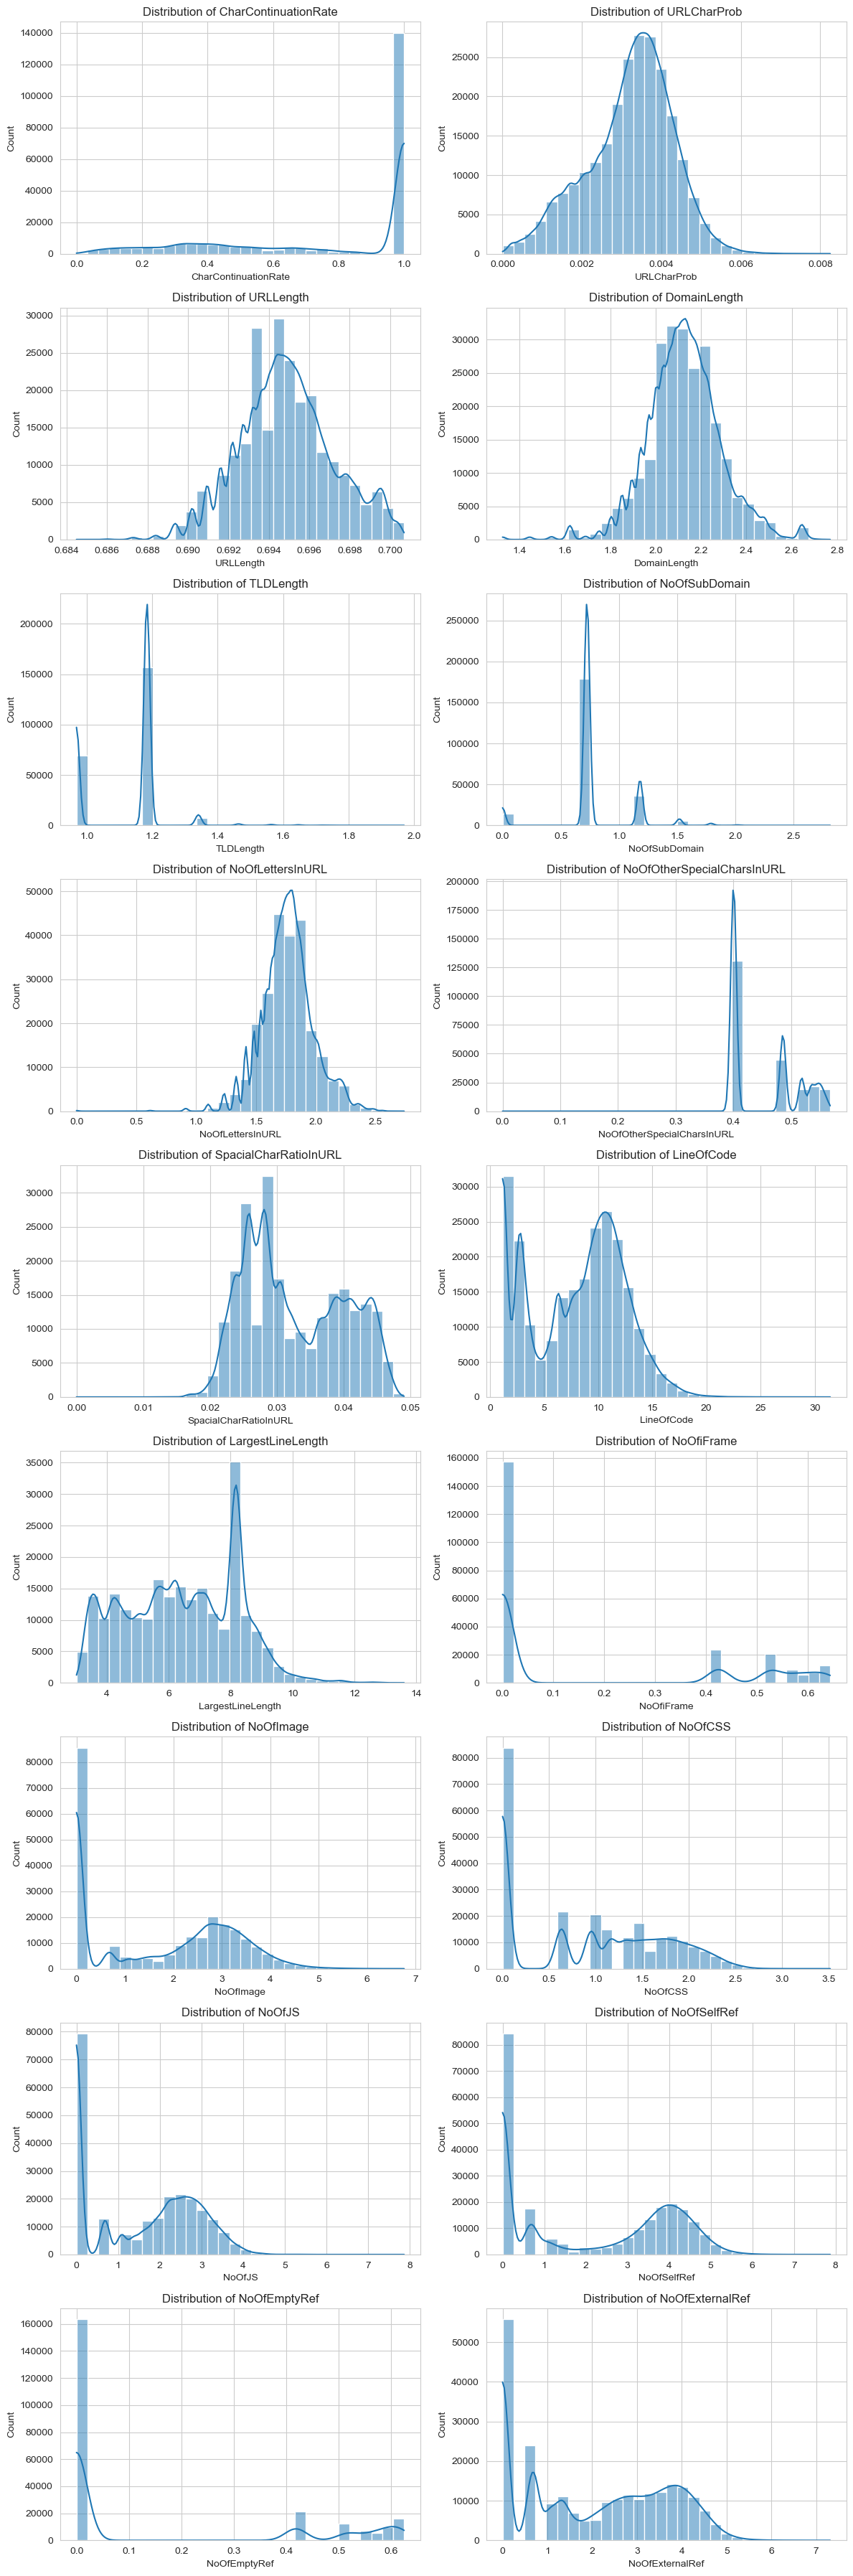

In [67]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.histplot(df_cleaned[col], kde=True, bins=30,ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [68]:
#saving the cleaned dataset
# df_cleaned.to_csv("cleaned_url_data.csv", index=False)

### Bivariate Analysis (Before removing skewness)

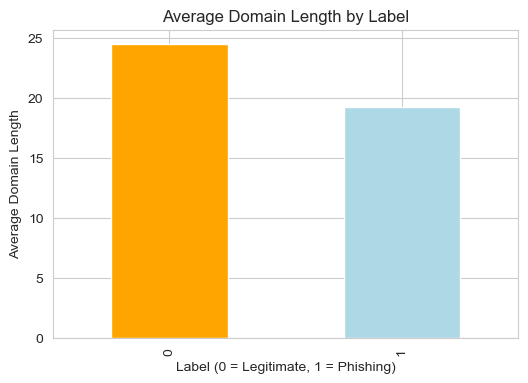

In [70]:
plt.figure(figsize=(6, 4))
df.groupby('label')['DomainLength'].mean().plot(kind='bar', color=['orange', 'lightblue'])
plt.title("Average Domain Length by Label")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Average Domain Length")
plt.show()

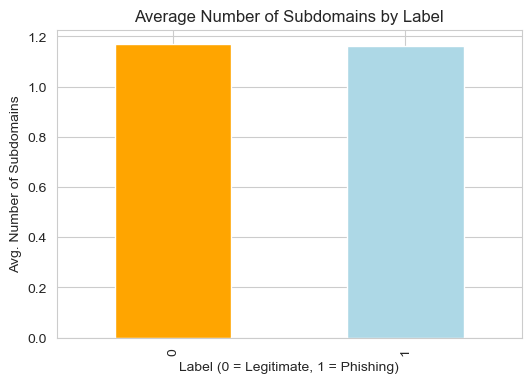

In [71]:
# Bar Chart: Average Number of Subdomains by Label
plt.figure(figsize=(6, 4))
df.groupby('label')['NoOfSubDomain'].mean().plot(kind='bar', color=['orange', 'lightblue'])
plt.title("Average Number of Subdomains by Label")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Avg. Number of Subdomains")
plt.show()

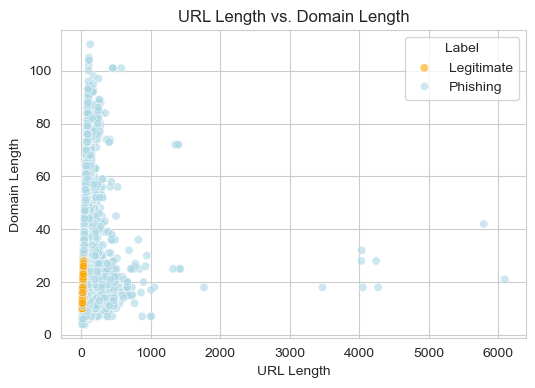

In [72]:
# Scatter Plot: URL Length vs. Domain Length
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['URLLength'], y=df['DomainLength'], hue=df['label'], palette=['lightblue','orange'], alpha=0.6)
plt.title("URL Length vs. Domain Length")
plt.xlabel("URL Length")
plt.ylabel("Domain Length")
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

Key Takeaway:

* Long URLs are a strong indicator of phishing attempts.
* Legitimate URLs tend to be shorter and more structured.
* Domain length alone is not a clear distinguishing factor but can contribute to a phishing detection model.

#### Multivariate Analysis

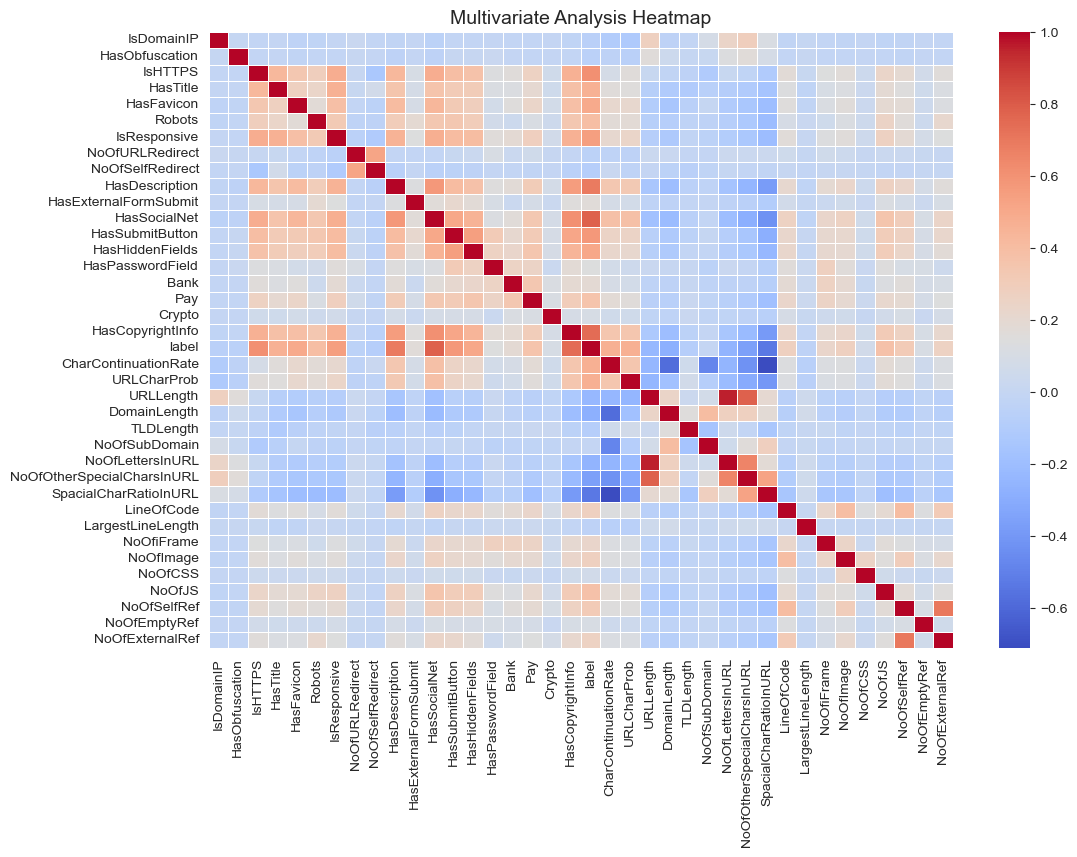

In [75]:
# Compute the correlation matrix
corr_matrix = df[numerical].corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Generate heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Show plot
plt.title("Multivariate Analysis Heatmap", fontsize=14)
plt.show()

In [76]:
#Droping highly correlated features (Either 'URL length' or 'NoOfLettersInURL' )
df_cleaned.drop(columns='NoOfLettersInURL',inplace=True)

### Encoding categorical values
Label encoding for ordinal and One hot for Nominal.

In [78]:
categorical_cols=df_cleaned.select_dtypes(include=['object']).columns
categorical_cols

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')

In [79]:
df_cleaned.select_dtypes(include=['object']).head()

,URL,Domain,TLD,Title
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina


In [80]:
df_cleaned['URL'].nunique()

235370

In [81]:
# Drop URL
# Why : 
''' It’s a unique identifier and won’t help in modeling directly.The URL column has 176,585 unique values, meaning almost every URL is unique.
Label Encoding would assign arbitrary numbers, but the model wouldn’t learn meaningful patterns.'''

df_cleaned.drop(columns=['URL'], inplace=True)

In [82]:
df_cleaned['Domain'].nunique()

220086

In [83]:
# Drop Domain
#Why :
'''Avoids high cardinality, reduces memory usage.Label encoding adds no meaningful order, ineffective for high-cardinality data'''

df_cleaned.drop(columns=['Domain'], inplace=True)

In [84]:
# Target Encoding for TLD
'''Why: Target Encoding (also known as Mean Encoding) is preferred for TLD (Top-Level Domain) because Target Encoding replaces each TLD with its
mean target value → keeps a single column → reduces complexity.'''

df_encoded=df_cleaned.copy()

tld_target_mean = df_encoded.groupby('TLD')['label'].mean()
df_encoded['TLD'] = df_encoded['TLD'].map(tld_target_mean)

# TF-IDF for Title
'''Why: Title is a text feature (not categorical), so it cannot be directly used in machine learning models.
TF-IDF converts text into numerical vectors by capturing the importance of words.
Instead of simple counting (Bag-of-Words approach), TF-IDF weighs words based on how frequently they appear across all titles.'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)

# Transform 'Title' column
title_features = tfidf.fit_transform(df_encoded['Title']).toarray()

# Replace 'Title' with mean TF-IDF score for each row
df_encoded['Title'] = np.mean(title_features, axis=1)

df_encoded.head()

,IsDomainIP,HasObfuscation,IsHTTPS,HasTitle,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,...,LargestLineLength,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD,Title
0,0,0,1,1,0,1,1,0,0,0,...,8.216508,0.424398,3.154417,2.084135,3.217430,4.222536,0.000000,4.099783,0.611129,0.000000
1,0,0,1,1,1,1,0,0,0,0,...,8.216508,0.000000,3.445522,1.720117,2.132741,3.347061,0.000000,4.489421,0.828328,0.000000
2,0,0,1,1,0,1,1,0,0,1,...,6.043295,0.000000,2.210788,0.952175,2.021625,3.406292,0.517360,1.684386,0.949648,0.000000
3,0,0,1,1,0,1,1,0,0,0,...,9.050401,0.631704,1.322323,2.206987,2.670442,2.886159,0.418901,3.078881,0.611129,0.003992
4,0,0,1,1,0,1,1,1,1,1,...,9.095231,0.526880,4.581111,1.959005,3.388557,3.832835,0.418901,3.829175,0.879264,0.000000


In [85]:
# Compute correlation of all features with the target
correlation = df_encoded.corr()['label'].sort_values(ascending=False)

print(correlation)

label                         1.000000
NoOfSelfRef                   0.872972
NoOfImage                     0.867367
NoOfExternalRef               0.863774
LineOfCode                    0.847514
NoOfJS                        0.845733
NoOfCSS                       0.805665
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
HasSubmitButton               0.578561
TLD                           0.554166
IsResponsive                  0.548608
LargestLineLength             0.530157
NoOfiFrame                    0.523463
NoOfEmptyRef                  0.518144
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.470568
CharContinuationRate          0.470041
HasTitle                      0.459725
Robots                        0.392620
Pay                           0.359747
Bank                          0.188959
HasExternalFormSubmit    

### Feature Selection using Select KBest method
Because of large number of features, We need to choose the best set and doing further analysis.

##### Use the Elbow Method (Optimal Feature Selection)
For choosing k vlaue for SelectKBest method. We are using Elbow method.

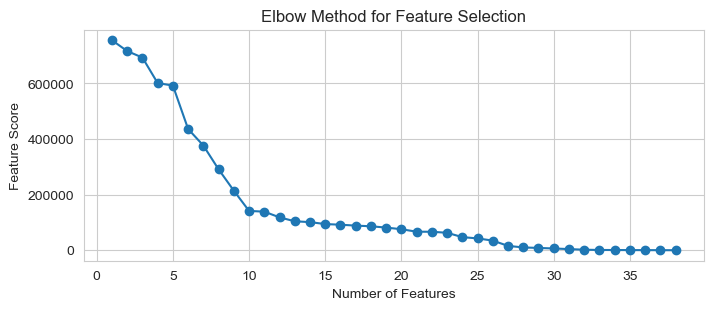

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_encoded.drop(columns=['label'])
y = df_encoded['label']

# Compute feature scores
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

# Sort scores in descending order
sorted_scores = np.sort(scores)[::-1]

# Plot scores to find the "elbow"
plt.figure(figsize=(8,3))
plt.plot(range(1, len(scores) + 1), sorted_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Feature Score")
plt.title("Elbow Method for Feature Selection")
plt.show()

choosing 15 as k value 

In [90]:
# Using Select Kbest method 
from sklearn.feature_selection import SelectKBest

# Compute feature scores
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)


# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['IsHTTPS', 'IsResponsive', 'HasDescription', 'HasSocialNet',
       'HasSubmitButton', 'HasCopyrightInfo', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'LineOfCode', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfExternalRef', 'TLD'],
      dtype='object')


<font color=green size=3>We got the features with best correlation with the target for training!!

#### Choosing 50000 instances for easy execution of the model before splitting the data.

In [93]:
# Select 50,000 random indices
random_indices = np.random.choice(X_selected.shape[0], 50000, replace=False)

# Use NumPy indexing directly
X_subset_selected = X_selected[random_indices]
y_subset = y[random_indices]  # Ensure labels are also selected correctly

### Feature Scaling


In [95]:
from sklearn.preprocessing import StandardScaler

#Initialising an object
scaler= StandardScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X_subset_selected)

# Convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_feature_names)

# Display the first few rows to check the transformation
X_scaled_df.head()

,IsHTTPS,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,LineOfCode,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfExternalRef,TLD
0,-1.907186,-1.285832,-0.883710,-0.918212,-0.847057,-0.974056,-0.852490,-0.999129,-1.085889,-1.151927,-1.154300,-1.196598,-1.109184,-1.286252,-0.030729
1,0.524333,0.777706,1.131593,1.089073,1.180559,1.026635,-0.852490,-0.875429,0.693444,0.780208,1.430755,1.210412,0.866042,0.640902,0.143615
2,0.524333,0.777706,-0.883710,1.089073,1.180559,1.026635,-0.852490,0.158795,0.790617,1.333782,1.649984,1.429402,0.961681,0.858763,1.184827
3,0.524333,0.777706,-0.883710,-0.918212,1.180559,-0.974056,1.381276,1.567193,-0.142596,0.130603,-0.369409,0.005815,-1.109184,-1.286252,0.143615
4,0.524333,0.777706,-0.883710,1.089073,-0.847057,1.026635,-0.852490,-0.999129,0.671328,0.759427,0.979246,1.184055,-1.109184,0.366960,0.143615


#### Applying Dimensionality reduction using PCA
Only applying for "KNN", "SVM", "Logistic Regression"

In [97]:
from sklearn.decomposition import PCA

#Dimensionality Reduction
pca = PCA(n_components=10)  # Adjust based on explained variance
X_train_pca = pca.fit_transform(X_scaled_df)

####  Train test split
For "Random Forest","XGBoost", "Decision Tree" we use unscaled data.<br>
For "KNN", "SVM", "Logistic Regression" we use scaled data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_subset_selected, y_subset, test_size=0.2, random_state=42)
X_train_spca, X_test_spca, y_train, y_test= train_test_split(X_train_pca, y_subset, test_size=0.2, random_state=42)

In [100]:
# Step 2: Define models
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


#  Step 3: Train models and store predictions
predictions = {}

for name, model in models.items():
    if name in ["KNN", "SVM", "Logistic Regression"]:  # Models requiring scaled data
        model.fit(X_train_spca, y_train)
        y_pred = model.predict(X_test_spca)
    else:  # Models that work fine without scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    predictions[name] = y_pred
    print(f" {name} trained and predictions stored!")

# Check stored predictions
print("\n Models trained successfully! Predictions are stored in 'predictions' dictionary.")


 KNN trained and predictions stored!
 SVM trained and predictions stored!
 Logistic Regression trained and predictions stored!
 Random Forest trained and predictions stored!
 XGBoost trained and predictions stored!
 Decision Tree trained and predictions stored!

 Models trained successfully! Predictions are stored in 'predictions' dictionary.


In [101]:
# Dictionary to store evaluation results
evaluation_results = {}

# Loop through models and calculate metrics
for name, y_pred in predictions.items():
    evaluation_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),  
        "Recall": recall_score(y_test, y_pred, average='weighted'),  
        "F1-score": f1_score(y_test, y_pred, average='weighted'),  
        "ROC-AUC": roc_auc_score(y_test, y_pred) if len(set(y_test)) == 2 else "N/A"
    }

# Convert results to a DataFrame for better visualization
eval_df = pd.DataFrame(evaluation_results).T


# Optional: Sort by Accuracy for better visualization
eval_df = eval_df.sort_values(by="Accuracy", ascending=False)

# Display sorted results
print("\n🔍 Sorted Model Performance (by Accuracy):")
print(eval_df)


🔍 Sorted Model Performance (by Accuracy):
                     Accuracy  Precision  Recall  F1-score   ROC-AUC
Random Forest          0.9986   0.998600  0.9986    0.9986  0.998507
XGBoost                0.9985   0.998501  0.9985    0.9985  0.998360
SVM                    0.9979   0.997900  0.9979    0.9979  0.997807
Decision Tree          0.9976   0.997600  0.9976    0.9976  0.997485
KNN                    0.9972   0.997200  0.9972    0.9972  0.997045
Logistic Regression    0.9970   0.997000  0.9970    0.9970  0.996902


### Hyper parameter tuning

**For SVM**

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'C': [0.1, 1, 10],  # Fewer values
    'kernel': ['linear', 'rbf'],  # Remove 'poly' (it's computationally expensive)
    'gamma': ['scale']  # Use only 'scale' (recommended for large datasets)
}

random_search_svm = RandomizedSearchCV(SVC(), param_dist, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_svm.fit(X_train_spca, y_train)

best_svm = random_search_svm.best_estimator_

# : Make predictions
y_pred_svm = best_svm.predict(X_test_spca)

# Step 6: Calculate all performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')  # Use 'macro' if classes are balanced
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test,y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# Step 7: Print results
print("Best parameters for Logistic Regression:", random_search_svm.best_params_)
print(f"Test Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")

Best parameters for Logistic Regression: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Test Accuracy: 0.9982
Precision: 0.9982
Recall: 0.9982
F1 Score: 0.9982
ROC-AUC Score: 0.9981


**For Logistic Regression** 

In [113]:
# Step 1: Define the hyperparameter grid
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization (L1 or L2)
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2
}

# Step 2: Initialize Logistic Regression model
logreg = LogisticRegression()

# Step 3: Perform hyperparameter tuning using RandomizedSearchCV
random_search_logreg = RandomizedSearchCV(
    logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_logreg.fit(X_train_spca, y_train)

# Step 4: Get the best model
best_logreg = random_search_logreg.best_estimator_

# Step 5: Make predictions on the test set
y_pred_logreg = best_logreg.predict(X_test_spca)

# Step 6: Calculate all performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')  # Use 'macro' if classes are balanced
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Step 7: Print results
print("Best parameters for Logistic Regression:", random_search_logreg.best_params_)
print(f"Test Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")
print(f"ROC-AUC Score: {roc_auc_logreg:.4f}")

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Test Accuracy: 0.9971
Precision: 0.9971
Recall: 0.9971
F1 Score: 0.9971
ROC-AUC Score: 0.9970


**For KNN**

In [117]:
# Step 1: Define hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Step 2: Initialize KNN model
knn = KNeighborsClassifier()

# Step 3: Perform RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(
    knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
random_search_knn.fit(X_train_spca, y_train)

# Step 4: Get the best model
best_knn = random_search_knn.best_estimator_

# Step 5: Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_spca)

# Step 6: Calculate all performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')  # Use 'macro' if classes are balanced
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# If it's a binary classification problem, calculate ROC-AUC
if len(set(y_test)) == 2:
    roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
else:
    roc_auc_knn = "Not applicable for multiclass classification"

# Step 7: Print results
print("Best parameters for KNN:", random_search_knn.best_params_)
print(f"Test Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")

Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Test Accuracy: 0.9976
Precision: 0.9976
Recall: 0.9976
F1 Score: 0.9976
ROC-AUC Score: 0.9975


#### For Decision Tree 

Decision Tree: Reduce Overfitting
Since Decision Trees tend to overfit, try the following:

🔹 Reduce Max Depth: Limit the tree depth using max_depth.<br>
🔹 Prune the Tree: Set min_samples_split (minimum samples to split a node) and min_samples_leaf (minimum samples per leaf).<br>
🔹 Use Cost Complexity Pruning (CCP): In sklearn.tree.DecisionTreeClassifier, adjust ccp_alpha (higher values prune more).<br>
🔹 Reduce Features Used: Try max_features to control feature selection.<br>

In [109]:
# Optimized Decision Tree
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=30, min_samples_leaf=15, ccp_alpha=0.02, random_state=42)
dt.fit(X_train, y_train)


# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

print(" Decision Tree Performance:")
print(f" Accuracy: {dt_accuracy:.4f}\n Precision: {dt_precision:.4f}\n Recall: {dt_recall:.4f}\n F1 Score: {dt_f1:.4f}\n ROC-AUC: {dt_roc_auc:.4f}")

 Decision Tree Performance:
 Accuracy: 0.9756
 Precision: 0.9751
 Recall: 0.9826
 F1 Score: 0.9788
 ROC-AUC: 0.9763


#### For Random Forest:
Even though Random Forest is an ensemble of trees, it can still overfit. Try:

🔹 Reduce Number of Trees: Lower n_estimators (e.g., 100 to 50).<br>
🔹 Limit Tree Depth: Use max_depth (e.g., 10 instead of None).<br>
🔹 Reduce Features per Split: Use max_features (e.g., "sqrt" or "log2").<br>
🔹 Increase Min Samples per Leaf: Set min_samples_leaf to at least 5-10.<br>
🔹 Use Out-of-Bag (OOB) Score: Enable oob_score=True to check generalization.<br>

In [111]:
# Optimized Random Forest
rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, 
    max_features="sqrt", oob_score=True, random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print("\n📌 Random Forest Performance:")
print(f" Accuracy: {rf_accuracy:.4f}\n Precision: {rf_precision:.4f}\n Recall: {rf_recall:.4f}\n F1 Score: {rf_f1:.4f}\n ROC-AUC: {rf_roc_auc:.4f}")


📌 Random Forest Performance:
 Accuracy: 0.9982
 Precision: 0.9977
 Recall: 0.9991
 F1 Score: 0.9984
 ROC-AUC: 0.9999


####  XGBoost: Reduce Overfitting
XGBoost can be prone to overfitting, so apply these:

🔹 Increase Regularization: Use lambda (L2 regularization) and alpha (L1 regularization).<br>
🔹 Use Lower Learning Rate: Try reducing learning_rate (e.g., 0.01-0.1).<br>
🔹 Reduce Tree Depth: Use max_depth=4-6 (default is 6).<br>
🔹 Add Early Stopping: Monitor validation loss and stop early.<br>
🔹 Reduce Boosting Rounds: Lower n_estimators (e.g., 100 instead of 500).<br>
🔹 Use Subsampling: Apply subsample=0.8 and colsample_bytree=0.8.<br>

In [118]:
import xgboost as xgb

# Before training, split your dataset into train (70%), validation (15%), and test (15%):

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X_subset_selected, y_subset, test_size=0.3, random_state=42)  # 70% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% test

# Optimized XGBoost with eval_metric inside the model definition
xgb_model = xgb.XGBClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.05, reg_lambda=10, reg_alpha=5, 
    subsample=0.8, colsample_bytree=0.8, random_state=42, eval_metric="logloss"  # ✅ Corrected here
)

# Fit model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("\n📌 XGBoost Performance:")
print(f" Accuracy: {xgb_accuracy:.4f}\n Precision: {xgb_precision:.4f}\n Recall: {xgb_recall:.4f}\n F1 Score: {xgb_f1:.4f}\n ROC-AUC: {xgb_roc_auc:.4f}")


📌 XGBoost Performance:
 Accuracy: 0.9979
 Precision: 0.9972
 Recall: 0.9991
 F1 Score: 0.9981
 ROC-AUC: 0.9999


### Checking Overfitting for Decision tree classifier
Compare training vs. test accuracy:

In [121]:
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9781
Test Accuracy: 0.9772


The training and test accuracy are very close (0.9781 vs. 0.9772), which means the model is well-generalized and not overfitting.

Final Decision:
✅ stopping tuning the parameters because:

There's no significant gap between training and test accuracy (indicating minimal overfitting).
Your recall improved, which is good if you care about correctly identifying positive cases.
The model is performing consistently on unseen data.